#### IMPORTANDO BIBLIOTECAS/MÓDULOS

In [26]:
from pycaret.datasets import get_data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

### PREPARANDO O DATASET

In [20]:
df = get_data('automobile')
df = df.dropna(subset='num-of-doors',axis=0)
df = df.fillna(df['normalized-losses'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

### AVALIAÇÃO DESCRITIVA DOS DADOS

In [21]:
pp.ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Criamos nosso normalizados(Deixará os dados numéricos em uma mesma escala) 
### Criamos nosso numerador(Transformará os dados categóricos em numéricos)

In [22]:
normalizador = MinMaxScaler()
numerador = OneHotEncoder(sparse=False)

### PRÉ-PROCESSAMENTO DOS DADOS E SEPARAÇÃO EM TREINO E TESTE

In [23]:
X_norm = normalizador.fit_transform(df.drop('price', axis=1).select_dtypes(exclude='object'))
X_num = numerador.fit_transform(df.drop('price', axis=1).select_dtypes(include='object'))
X = np.append(X_norm,X_num,axis=1)
X = normalizador.fit_transform(X)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 226)
(50, 226)
(150,)
(50,)


### SELEÇÃO E AVALIAÇÃO DOS MODELOS


 RandomForestRegressor(max_depth=10, n_estimators=500) 

RSME =  1999.68
R2 SCORE =  95.2


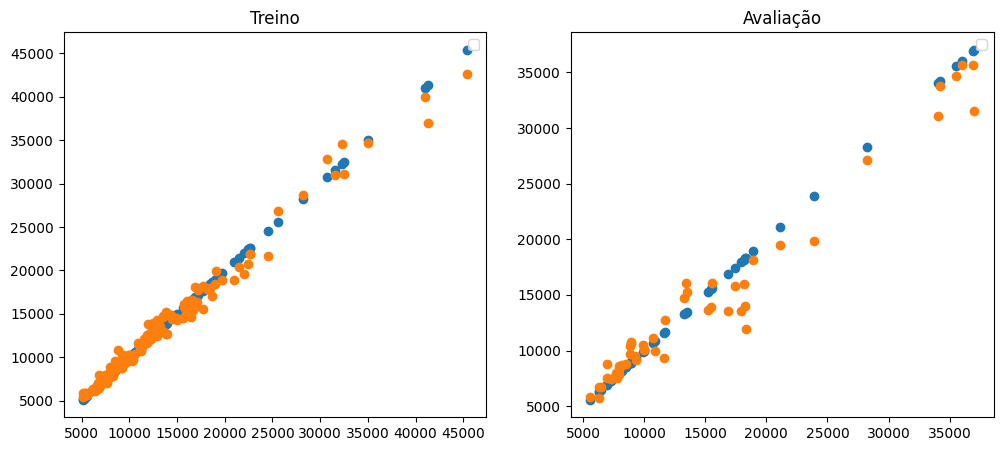


 ExtraTreesRegressor(max_depth=10, n_estimators=500) 

RSME =  2173.31
R2 SCORE =  94.33


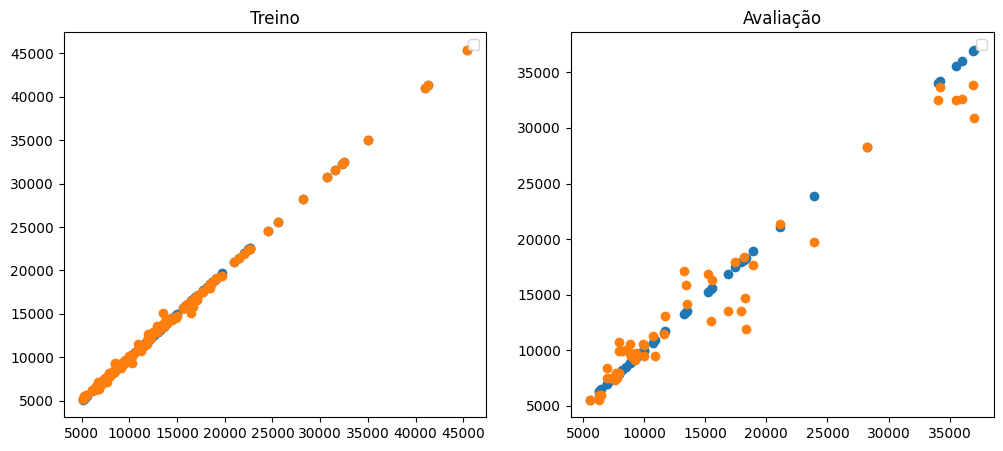


 DecisionTreeRegressor(max_depth=10) 

RSME =  3208.55
R2 SCORE =  87.65


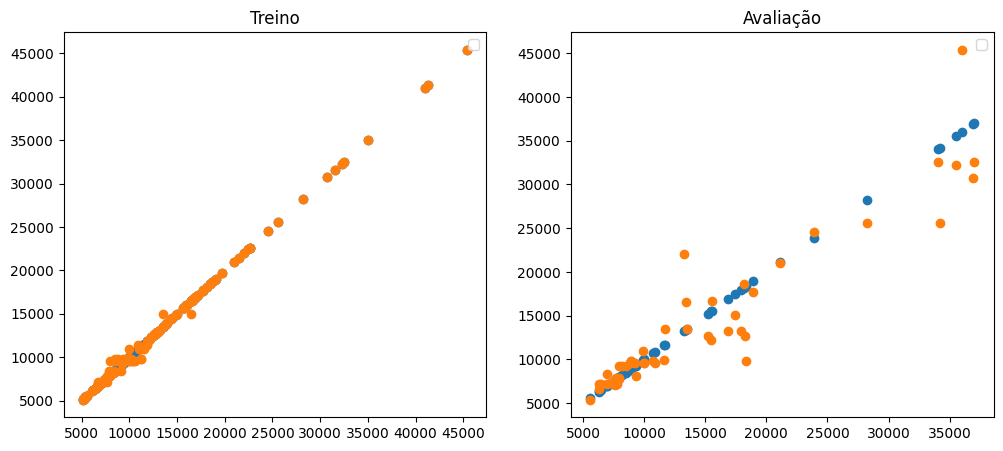


 SVR(kernel='poly') 

RSME =  10165.1
R2 SCORE =  -23.94


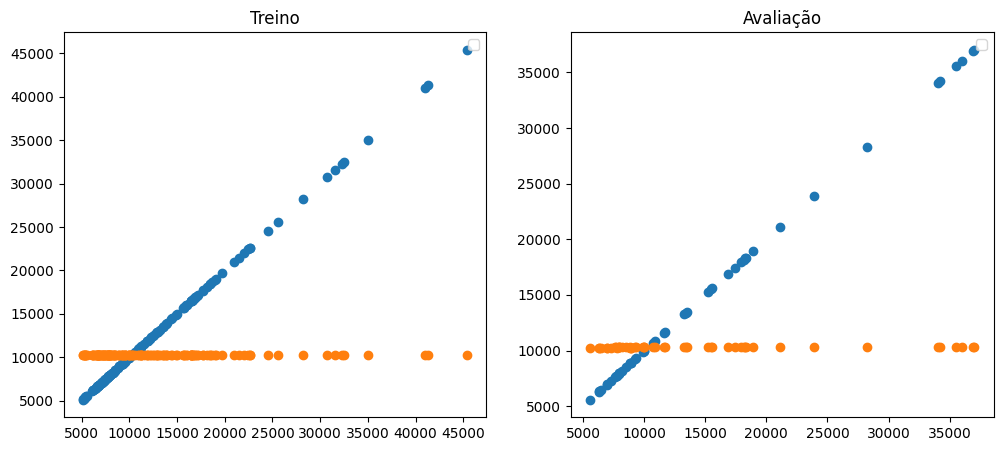


 SVR(kernel='sigmoid') 

RSME =  10165.87
R2 SCORE =  -23.95


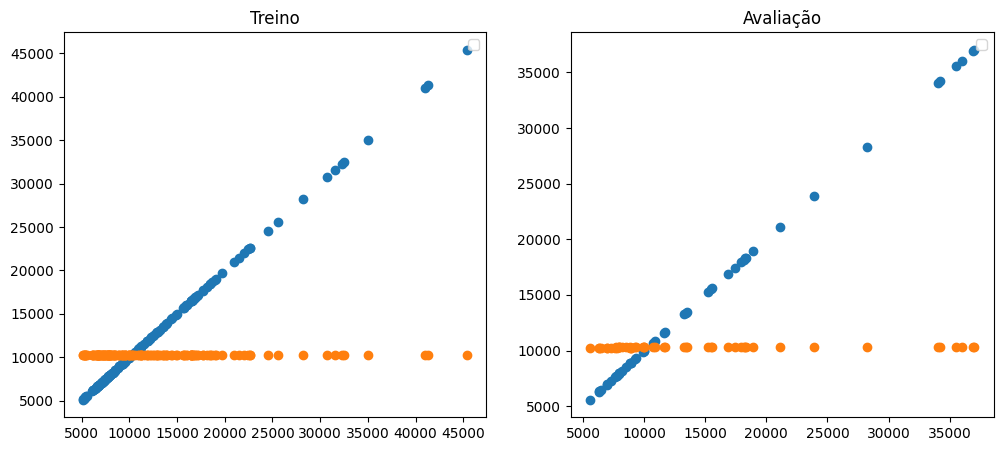


 SVR(kernel='linear') 

RSME =  10038.3
R2 SCORE =  -20.86


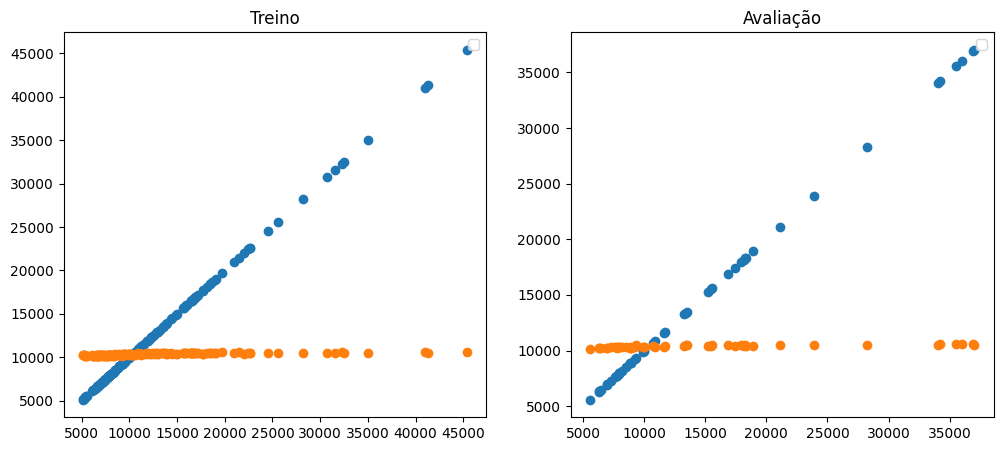


 SVR() 

RSME =  10167.01
R2 SCORE =  -23.98


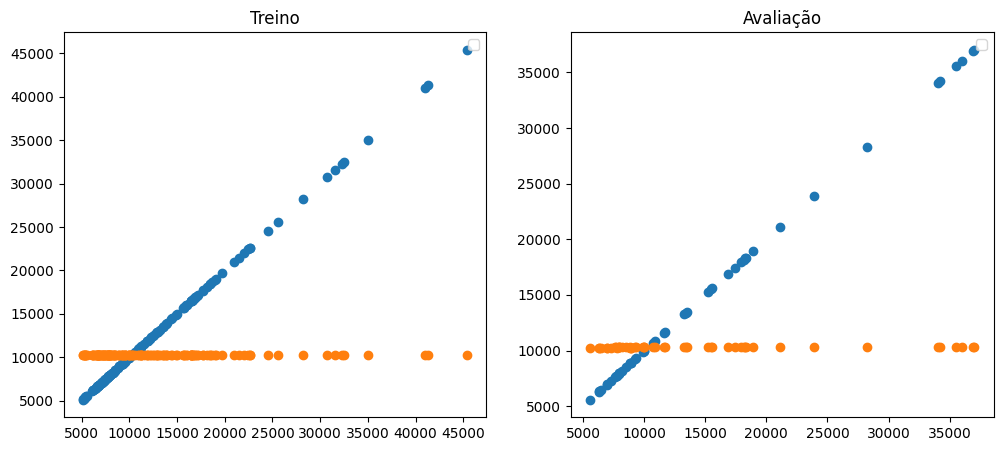


 KNeighborsRegressor() 

RSME =  5123.81
R2 SCORE =  68.51


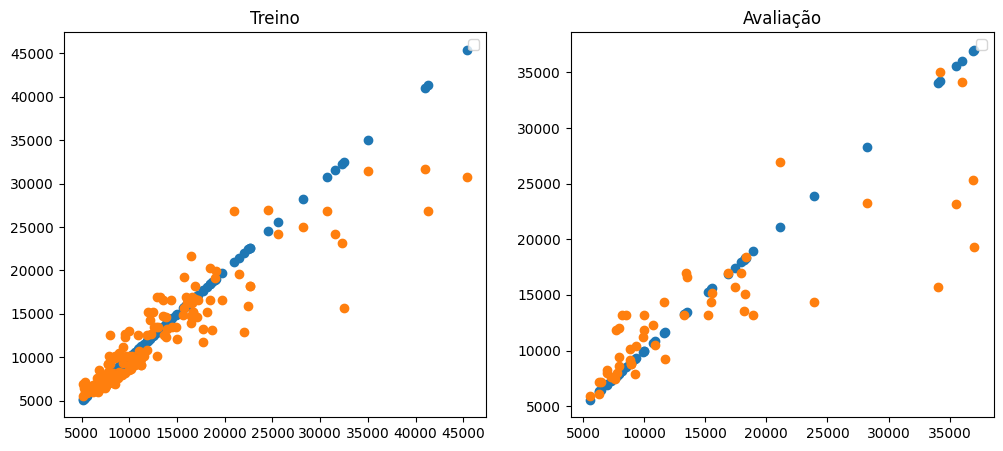


 LinearRegression() 

RSME =  3.880950911004456e+16
R2 SCORE =  -1.8065379501230718e+27


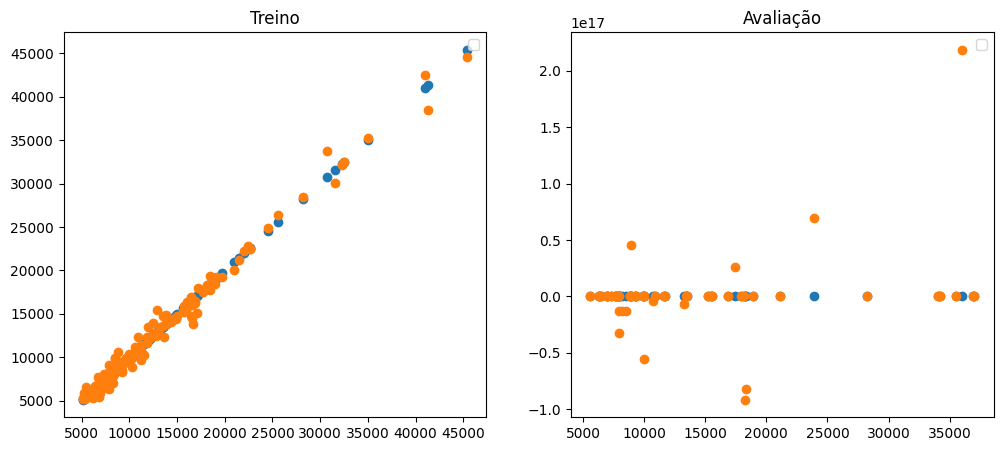


 MLPRegressor() 

RSME =  17270.2
R2 SCORE =  -257.74


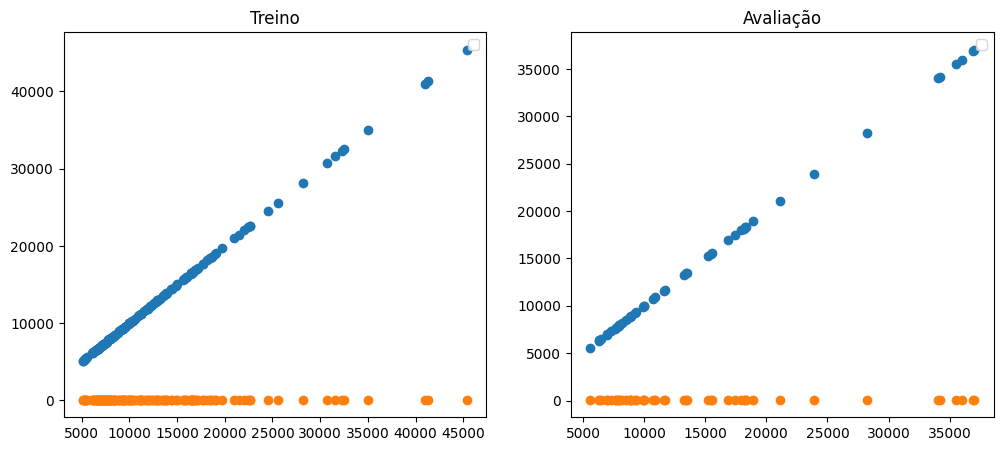


 MLPRegressor(solver='lbfgs') 

RSME =  2309.94
R2 SCORE =  93.6


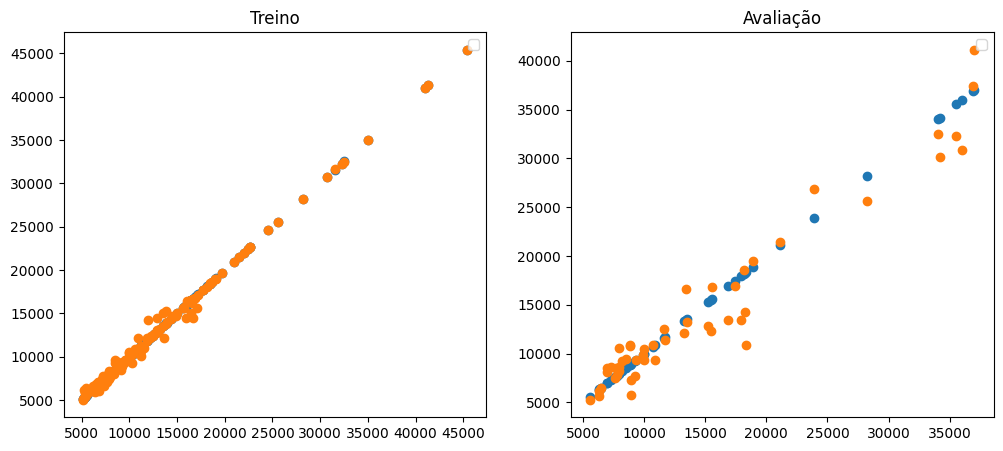


 MLPRegressor(solver='sgd') 

RSME =  71645.93
R2 SCORE =  -6056.78


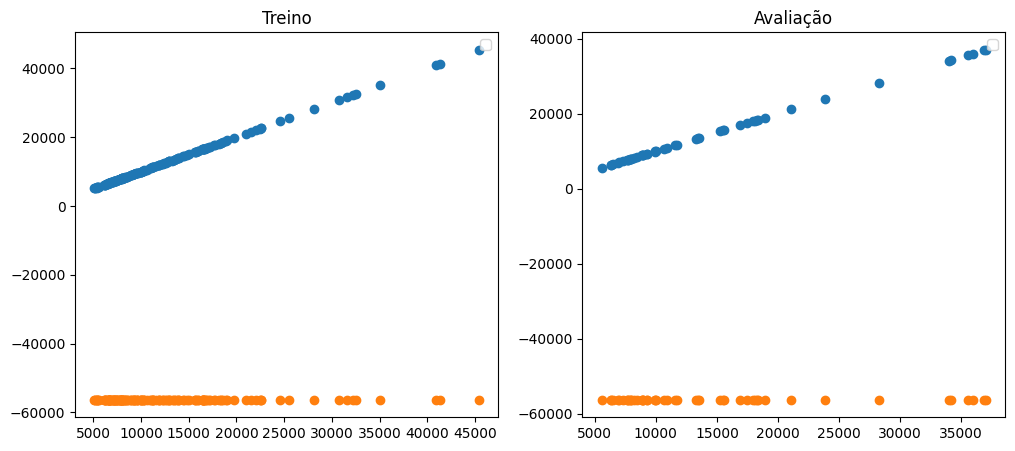


 AdaBoostRegressor() 

RSME =  2016.52
R2 SCORE =  95.12


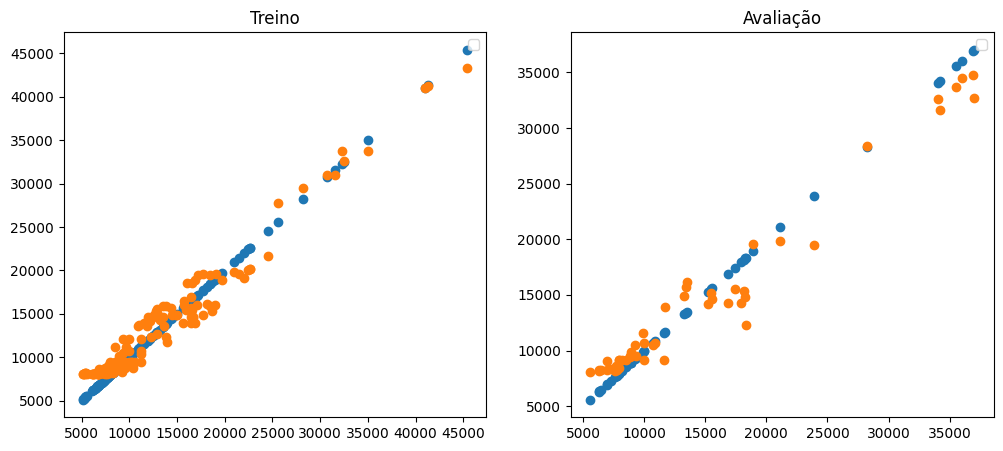


 GradientBoostingRegressor() 

RSME =  2068.16
R2 SCORE =  94.87


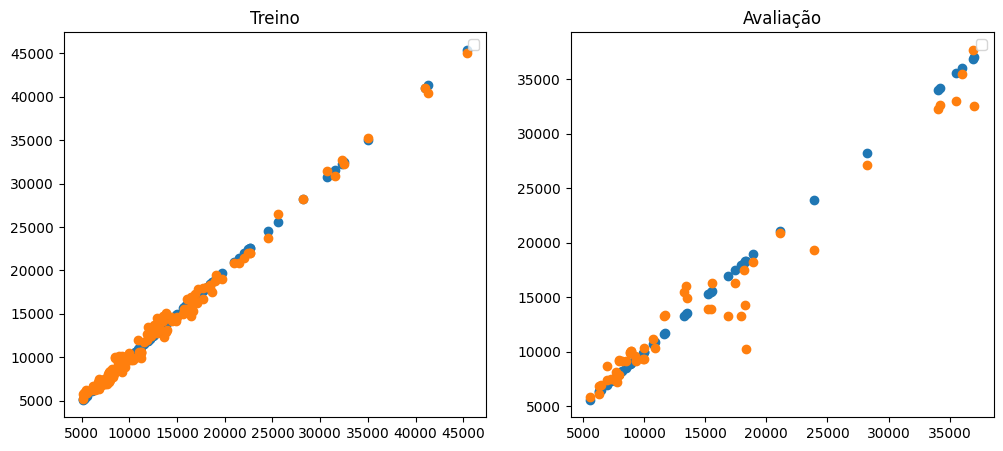

,ML,RSME,R2 SCORE
0,"(DecisionTreeRegressor(max_depth=10, max_featu...",1.999680e+03,9.520000e+01
12,"(DecisionTreeRegressor(max_depth=3, random_sta...",2.016520e+03,9.512000e+01
13,([DecisionTreeRegressor(criterion='friedman_ms...,2.068160e+03,9.487000e+01
1,"(ExtraTreeRegressor(max_depth=10, random_state...",2.173310e+03,9.433000e+01
10,MLPRegressor(solver='lbfgs'),2.309940e+03,9.360000e+01
2,DecisionTreeRegressor(max_depth=10),3.208550e+03,8.765000e+01
7,KNeighborsRegressor(),5.123810e+03,6.851000e+01
5,SVR(kernel='linear'),1.003830e+04,-2.086000e+01
3,SVR(kernel='poly'),1.016510e+04,-2.394000e+01
4,SVR(kernel='sigmoid'),1.016587e+04,-2.395000e+01


In [27]:
modelos = [RandomForestRegressor(max_depth=10, n_estimators=500), ExtraTreesRegressor(n_estimators=500, max_depth=10), DecisionTreeRegressor(max_depth=10),
           SVR(kernel='poly'), SVR(kernel='sigmoid'), SVR(kernel='linear'), SVR(), KNeighborsRegressor(n_neighbors=5), LinearRegression(), MLPRegressor(solver='adam'),
           MLPRegressor(solver='lbfgs'), MLPRegressor(solver='sgd'), AdaBoostRegressor(), GradientBoostingRegressor()]

lista = []

for modelo in modelos:
    modelo.fit(X_train,y_train)
    treino_predict = modelo.predict(X_train)
    predict = modelo.predict(X_test)
    print('\n',modelo,'\n')
    RSME = np.round(np.sqrt(mean_squared_error(y_test, predict)),decimals=2)
    R2 = np.round(r2_score(y_test, predict) * 100,decimals=2)
    print('RSME = ',RSME)
    print('R2 SCORE = ',R2)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title('Treino')
    plt.legend(['Real','Previsto'])
    plt.scatter(y_train, y_train)
    plt.scatter(y_train, treino_predict)

    plt.subplot(1, 2, 2)
    plt.title('Avaliação')
    plt.legend(['Real','Previsto'])
    plt.scatter(y_test, y_test)
    plt.scatter(y_test, predict)
    plt.show()

    lista.append((modelo,RSME,R2))

resumo = pd.DataFrame(lista,columns=['ML','RSME','R2 SCORE'])
resumo.sort_values(by='RSME',axis=0,ascending=True)

### SALVANDO OS MODELOS DE MACHINE LEARNING E DE PRÉ-PROCESSAMENTO

In [ ]:
import joblib

joblib.dump('BEST_MODEL','model.pkl')
joblib.dump(normalizador,'escala.joblib')
joblib.dump(numerador,'numeric.joblib')

### CARREGANDO OS MODELOS DE MACHINE LEARNING E DE PRÉ-PROCESSAMENTO

In [ ]:
import joblib

modelo = joblib.load('model.pkl')
scala = joblib.load('escala.joblib')
numeric = joblib.load('numeric.joblib')